<img src= 'https://miro.medium.com/max/1400/1*ljCBykAJUnvaZcuPYwm4_A.png'>

O “20 Newsgroups” é um conjunto de dados disponível publicamente para uso em pesquisas. Contém aproximadamente 20k documentos, divididos em cerca de 20 categorias. É um data set popular e conhecido pelo seu uso tarefas de classificação de textos em machine learning. Os conteúdos do data set estão separados por categoria e algumas destas categorias são muito próximas: comp.sys.ibm.pc.hardware / comp.sys.mac.hardware. Há outras categorias que não possuem quaisquer semelhanças: rec.autos / talk.politics.misc. Nosso objetivo aqui é obter um modelo capaz de classificar textos em algumas destas categorias. Fonte: https://medium.com/luisfredgs/classificando-textos-com-machine-learning-e054ca7bf4e0

In [1]:
from matplotlib import pyplot as plt

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,  ConfusionMatrixDisplay, confusion_matrix, accuracy_score

In [2]:
twenty_train = fetch_20newsgroups(subset='train', shuffle=True)
twenty_test = fetch_20newsgroups(subset='test', shuffle=True)

In [3]:
twenty_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [4]:
for i in range(5):
  print('***************************************************************************************************************************************')
  print(f'Amostra {i}')
  print(f'Classe No: {twenty_train.target[i]}, Nome da Classe: {twenty_train.target_names[twenty_train.target[i]]}')
  print('')
  print(twenty_train.data[i])

***************************************************************************************************************************************
Amostra 0
Classe No: 7, Nome da Classe: rec.autos

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





*******************************************************************************************

In [5]:
print(len(twenty_train.data))
print(len(twenty_test.data))

11314
7532


TF-IDF significa frequência do termo–inverso da frequência nos documentos e se baseia na seguinte formula:

<img src = 'https://miro.medium.com/max/700/1*V9ac4hLVyms79jl65Ym_Bw.png'>

In [6]:
X_train = twenty_train.data
vectorizer = TfidfVectorizer(stop_words='english', min_df=15)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_train_tfidf.shape

(11314, 11090)

In [7]:
y_train = twenty_train.target
y_test = twenty_test.target

In [8]:
X_test_tfidf = vectorizer.transform(twenty_test.data)

In [9]:
X_test_tfidf.shape

(7532, 11090)

Experimentação com Multinomial Naive Bayes

In [11]:
classificador_mnb = MultinomialNB()
classificador_mnb.fit(X_train_tfidf, y_train)

MultinomialNB()

In [12]:
y_pred = classificador_mnb.predict(X_test_tfidf)

In [13]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.69      0.74       319
           1       0.67      0.74      0.70       389
           2       0.73      0.73      0.73       394
           3       0.64      0.73      0.68       392
           4       0.85      0.78      0.81       385
           5       0.81      0.77      0.79       395
           6       0.80      0.83      0.81       390
           7       0.86      0.88      0.87       396
           8       0.90      0.93      0.91       398
           9       0.90      0.91      0.90       397
          10       0.89      0.98      0.93       399
          11       0.89      0.92      0.90       396
          12       0.78      0.64      0.71       393
          13       0.89      0.79      0.84       396
          14       0.84      0.90      0.87       394
          15       0.67      0.94      0.78       398
          16       0.69      0.92      0.79       364
          17       0.94    

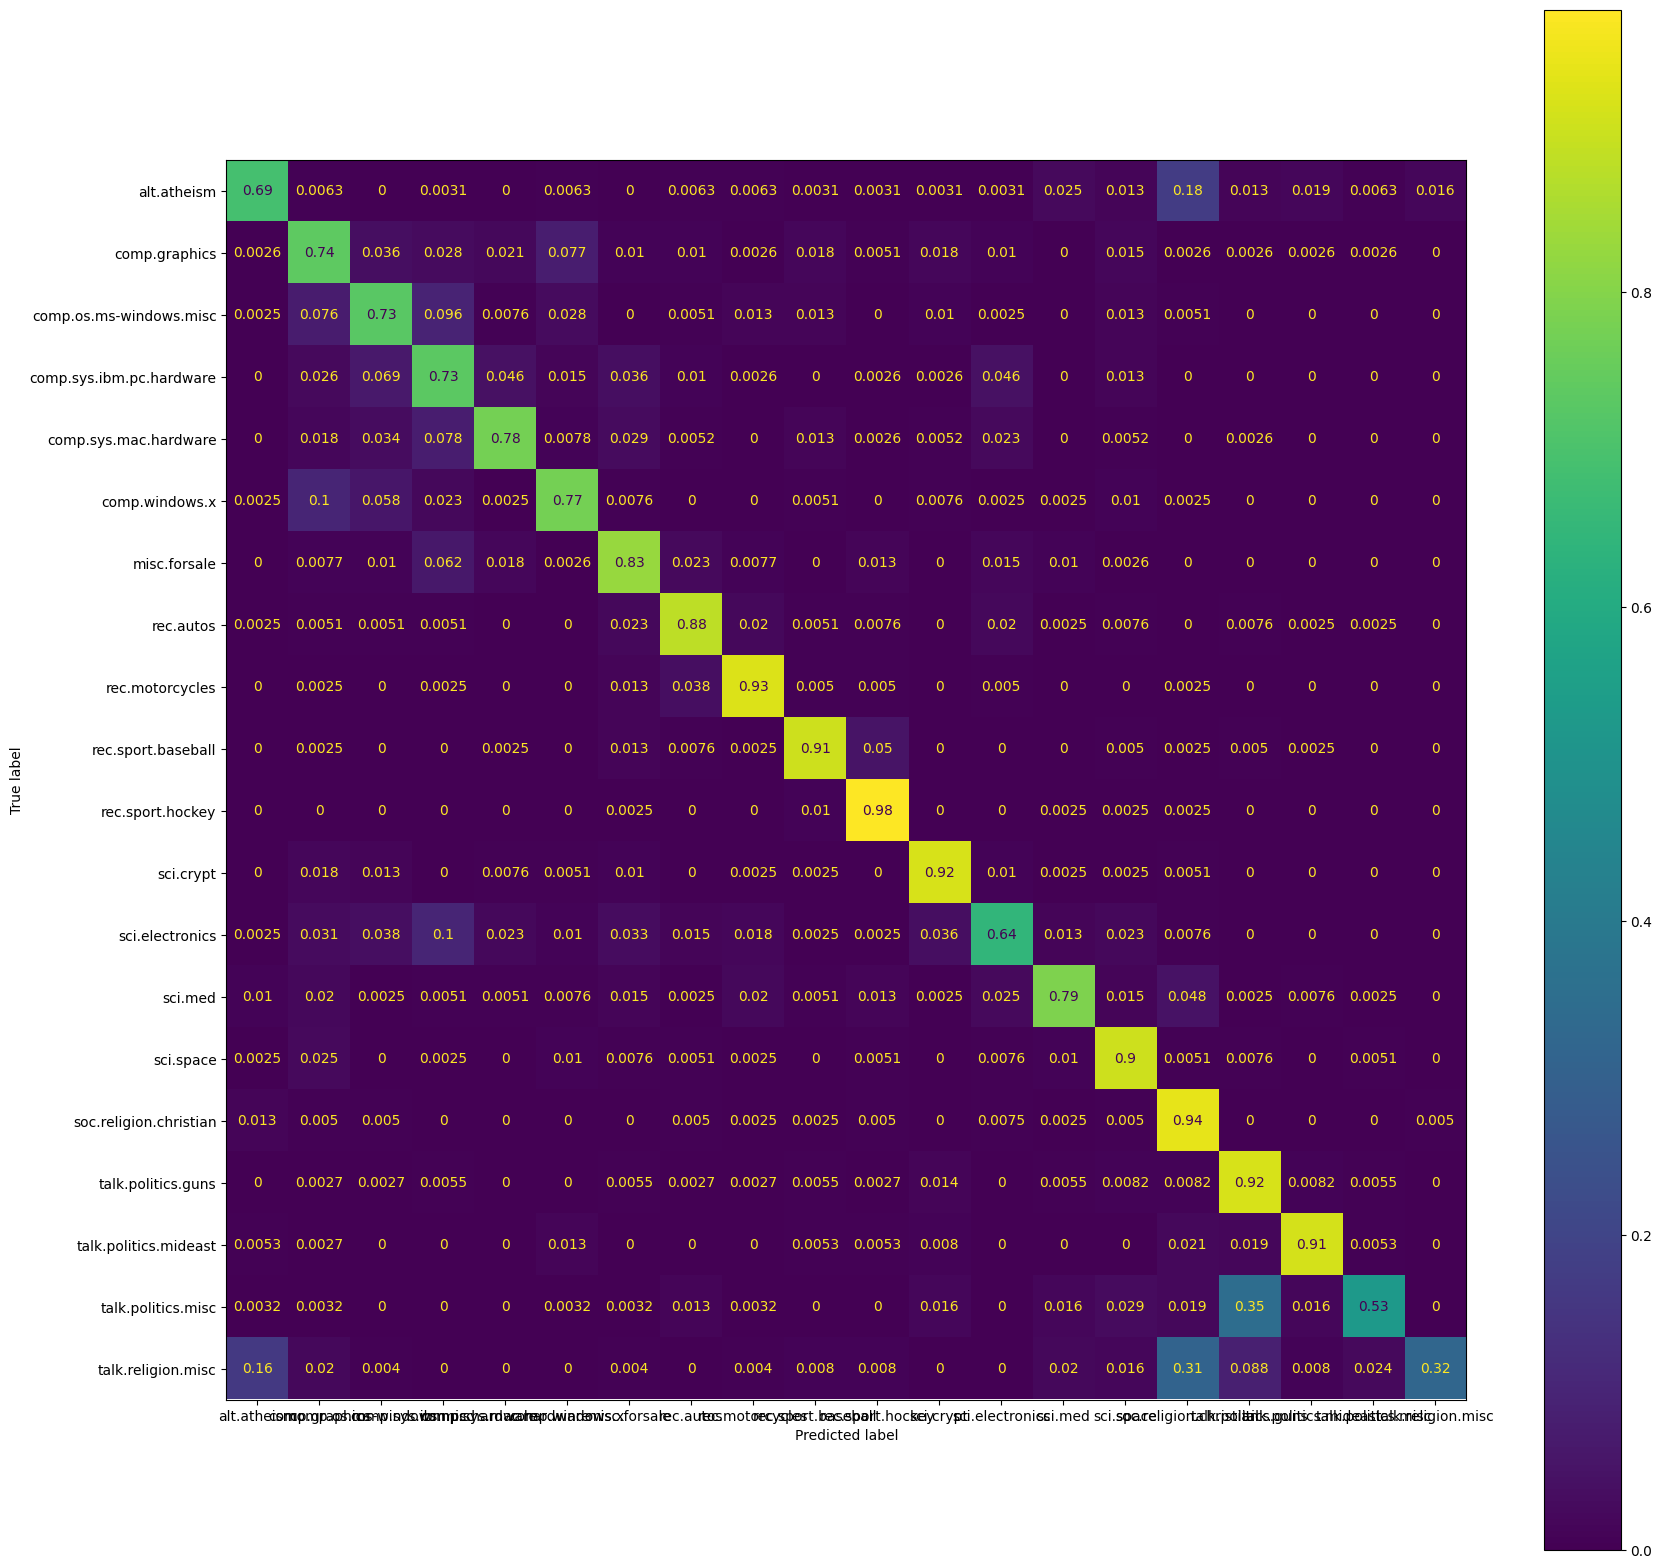

In [14]:
fig, ax = plt.subplots(figsize=(20, 20))

cm = confusion_matrix( y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(cm, display_labels = twenty_train.target_names)
disp.plot(ax=ax)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

Experimentação com SVM


In [15]:
classificador_SVM = SVC(C=1, kernel = 'linear')
classificador_SVM.fit(X_train_tfidf, y_train)

SVC(C=1, kernel='linear')

In [16]:
y_pred = classificador_SVM.predict(X_test_tfidf)

In [17]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.71      0.76       319
           1       0.64      0.76      0.70       389
           2       0.74      0.71      0.73       394
           3       0.66      0.76      0.71       392
           4       0.80      0.78      0.79       385
           5       0.82      0.73      0.77       395
           6       0.79      0.87      0.83       390
           7       0.85      0.86      0.86       396
           8       0.95      0.91      0.93       398
           9       0.90      0.91      0.91       397
          10       0.97      0.95      0.96       399
          11       0.96      0.88      0.92       396
          12       0.66      0.74      0.70       393
          13       0.83      0.81      0.82       396
          14       0.89      0.89      0.89       394
          15       0.83      0.91      0.87       398
          16       0.73      0.88      0.80       364
          17       0.97    

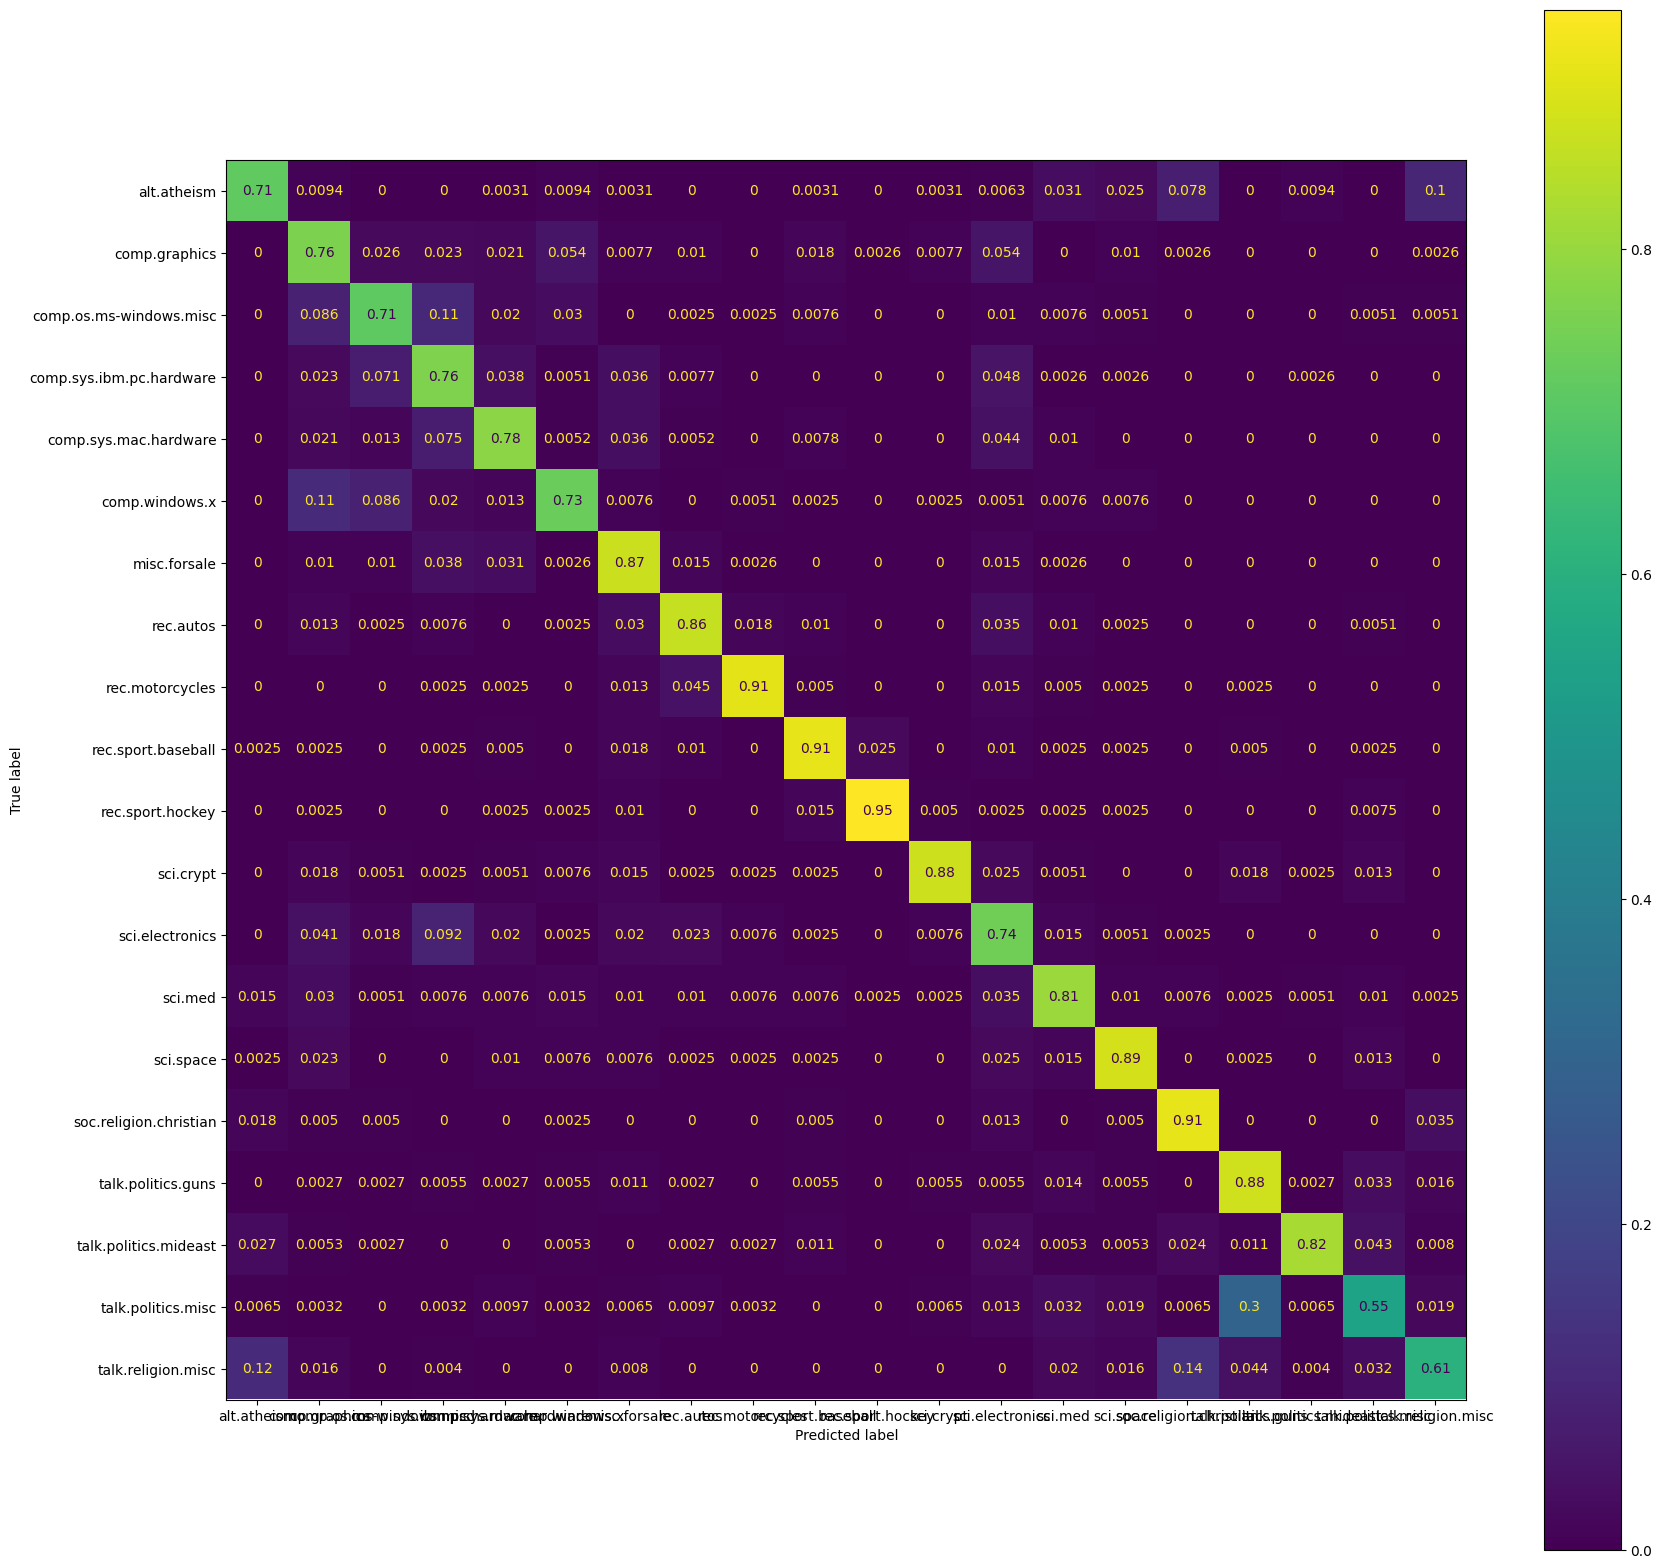

In [18]:
fig, ax = plt.subplots(figsize=(20, 20))
cm = confusion_matrix( y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(cm, display_labels = twenty_train.target_names)
disp.plot(ax=ax)